# [Eurostat API](https://ec.europa.eu/eurostat/databrowser/explore/all/economy?lang=en&subtheme=prc.prc_hicp&display=list&sort=category&extractionId=prc_hicp_manr)

In [80]:
pd.set_option('display.max_rows', None) # pd.reset_option('display.max_rows')
pd.set_option('display.max_colwidth', None)

**Dataset Eurostat più utili** in base a **copertura temporale, granularità territoriale, frequenza, rilevanza economica** e **aggiornamento recente**.

## 🧩 **1. PIL e principali aggregati nazionali**

Questi sono i **pilastri macroeconomici** per analisi di lungo periodo:

| Titolo                                                                   | Codice                   | Periodo               | Frequenza   | Note                            |
| ------------------------------------------------------------------------ | ------------------------ | --------------------- | ----------- | ------------------------------- |
| **Gross domestic product (GDP) and main components**                     | `NAMA_10_GDP`            | 1975–2024             | Annuale     | Output, spesa, reddito          |
| **Gross domestic product (GDP) and main components - quarterly**         | `NAMQ_10_GDP`            | 1975Q1–2025Q1         | Trimestrale | Serie trimestrale standard      |
| **GDP and main aggregates - international data cooperation (annual)**    | `NAIDA_10_GDP`           | 1975–2024             | Annuale     | Dati armonizzati internazionali |
| **GDP and main aggregates - international data cooperation (quarterly)** | `NAIDQ_10_GDP`           | 1975Q1–2025Q1         | Trimestrale | Come sopra, ma trimestrale      |
| **Gross domestic product (GDP) and main components per capita**          | `NAMA_10_PC`             | 1975–2024             | Annuale     | Per capita                      |
| **Real GDP per capita**                                                  | `TIPSNA40` / `SDG_08_10` | 1995–2024 / 2000–2024 | Annuale     | Valore reale                    |

---

## 🌍 **2. PIL regionale**

Indispensabili per analisi territoriali a livello NUTS2/NUTS3:

| Titolo                                    | Codice             | Area  | Periodo   | Note                       |
| ----------------------------------------- | ------------------ | ----- | --------- | -------------------------- |
| **GDP at market prices by NUTS 2 region** | `NAMA_10R_2GDP`    | NUTS2 | 2000–2023 | PIL nominale               |
| **GDP in volume by NUTS 2 region**        | `NAMA_10R_2GVAGR`  | NUTS2 | 1995–2023 | PIL reale                  |
| **GDP by NUTS 3 region**                  | `NAMA_10R_3GDP`    | NUTS3 | 2000–2023 | Alta granularità           |
| **Population for regional GDP (NUTS3)**   | `NAMA_10R_3POPGDP` | NUTS3 | 2000–2023 | Per calcolo PIL pro capite |

---

## 📊 **3. PIL trimestrale e versioni vintage**

Utili per cicli economici, nowcasting e retrospettive storiche:

| Titolo                           | Codice        | Periodo       | Note                                 |
| -------------------------------- | ------------- | ------------- | ------------------------------------ |
| **Quarterly GDP vintage series** | `EI_NA_Q_VTG` | 1995Q1–2024Q4 | Versioni storiche ESA 2010           |
| **GDP deflator (quarterly)**     | `TEINA110`    | 2022Q2–2025Q1 | Utile per convertire in valori reali |

---

## 🏛️ **4. Indicatori strutturali e % su PIL**

Utile per analisi settoriali o sostenibilità macro:

| Titolo                                                             | Codice                  | Tema                  | Periodo   |
| ------------------------------------------------------------------ | ----------------------- | --------------------- | --------- |
| **Exports/imports in % of GDP**                                    | `TET00003` / `TET00004` | Commercio estero      | 2013–2024 |
| **Public expenditure on education / pensions / social protection** | `TPS00103` / `TPS00098` | Welfare               | 2011–2022 |
| **Direct investment flows/stocks (% GDP)**                         | `TIPSBP100`, `TIPSBP90` | Investimenti diretti  | 1995–2024 |
| **Private sector debt/credit (% GDP)**                             | `TIPSPD20`, `TIPSPC20`  | Indebitamento privato | 1995–2024 |

---

## ⚖️ **5. Conti esterni e posizione internazionale**

Per rischio Paese, sostenibilità debitoria, saldi macro:

| Titolo                                            | Codice                 | Periodo                   | Note                        |
| ------------------------------------------------- | ---------------------- | ------------------------- | --------------------------- |
| **Current account balance (% GDP)**               | `TIPSBP11`, `TIPSBP41` | 1995–2024                 | Annuale e trimestrale       |
| **Net international investment position (% GDP)** | `TIPSII40`             | 1995Q4–2024Q4             | Posizione netta sull’estero |
| **Net external debt (% GDP)**                     | `TIPSII20`, `TIPSII30` | 1995–2024 / 1995Q4–2024Q4 | Debito estero netto         |

---

### ✅ *Raccomandazioni operative*

* Per **analisi macro storiche** → `NAMA_10_GDP`, `NAMQ_10_GDP`, `NAMA_10_PC`
* Per **confronti territoriali** → `NAMA_10R_2GDP`, `NAMA_10R_2GVAGR`, `NAMA_10R_3GDP`
* Per **modelli econometrici quarterly** → `NAMQ_10_GDP`, `EI_NA_Q_VTG`, `NAIDQ_10_GDP`
* Per **indebitamento e stabilità finanziaria** → `TIPSPD*`, `TIPSII*`, `TIPSBP*`

## prova

In [4]:
# Set the URL and directory where you want to save the dataset
url = 'https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/prc_hicp_manr?format=TSV&compressed=true'
eurostat_code = "prc_hicp_manr"
directory_path = 'D:/'

In [5]:
import os
import gzip
import urllib.request


def download_eurostat_dataset(dataset):
    # Ensure the directory exists, create it if it doesn't
    if not os.path.exists(directory_path):
        os.makedirs(directory_path)

    out_file = os.path.join(directory_path, dataset + ".tsv")

    # Remove the existing file if it exists
    if os.path.exists(out_file):
        os.remove(out_file)

    try:
        # Download and decompress the dataset
        with urllib.request.urlopen(url) as resp:
            with gzip.GzipFile(fileobj=resp) as data:
                file_content = data.read()

        # Write the decompressed content to the TSV file
        with open(out_file, 'wb') as f:
            f.write(file_content)

        print(f"File downloaded and saved to {out_file}")

    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
download_eurostat_dataset(eurostat_code)


File downloaded and saved to D:/prc_hicp_manr.tsv


In [6]:
import pandas as pd



def get_eurostat_dataset(dataset):
    download_eurostat_dataset(dataset) 
    file_path = os.path.join(directory_path, dataset + ".tsv")  # Use the specified directory path
    df = pd.read_csv(file_path, sep=",|\t| [^ ]?\t", na_values=":", engine="python")
    df.columns = [x.split('\\')[0].strip(' ') for x in df.columns]
    return df

# Call the function to get the dataset (e.g., eurostat_code)
df = get_eurostat_dataset(eurostat_code)

File downloaded and saved to D:/prc_hicp_manr.tsv


In [7]:
df

,freq,unit,coicop,geo,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,...,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12,2025-01,2025-02,2025-03,2025-04
0,M,RCH_A,AP,AL,NaN,NaN,NaN,NaN,NaN,NaN,...,0.5,0.5,0.4,0.5,0.5,0.6,0.6,-0.3,0.0,NaN
1,M,RCH_A,AP,AT,NaN,NaN,NaN,NaN,NaN,NaN,...,5.8,5.6,4.9,4.8,4.5,4.6,4.9,4.9,5.0,NaN
2,M,RCH_A,AP,BE,NaN,NaN,NaN,NaN,NaN,NaN,...,3.5,3.4,3.3,3.0,2.9,2.9,4.1,4.2,4.1,NaN
3,M,RCH_A,AP,BG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,3.7,3.2,3.8,3.2,3.4,5.9,6.4,7.1,NaN
4,M,RCH_A,AP,CH,NaN,NaN,NaN,NaN,NaN,NaN,...,1.2,1.2,1.1,1.1,1.1,0.9,-0.4,-0.3,-0.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17712,M,RCH_A,TOT_X_TBC,SI,NaN,NaN,NaN,NaN,NaN,NaN,...,1.2,1.0,0.5,-0.2,1.5,1.9,2.2,1.8,2.1,NaN
17713,M,RCH_A,TOT_X_TBC,SK,5.8,6.0,6.3,6.4,6.0,6.1,...,2.8,3.1,2.8,3.4,3.5,3.1,4.1,4.1,4.2,NaN
17714,M,RCH_A,TOT_X_TBC,TR,76.6,78.5,78.8,75.7,76.1,76.1,...,61.9,51.7,49.4,48.6,47.5,44.6,42.5,39.3,37.8,NaN
17715,M,RCH_A,TOT_X_TBC,UK,1.9,1.7,1.4,1.3,1.3,1.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## [Eurostat API](https://www.kaggle.com/code/crischir/eurostat-api)

In [32]:
import requests
import pandas as pd

# === URL e parametri ===
url = "https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/demo_pjan"
params = {
    "format": "json",
    "geo": "IT",
    "sex": "T",
    "age": "TOTAL",
    "time": "2020"
}

# === Richiesta ===
response = requests.get(url, params=params)
response.raise_for_status()
data = response.json()

# === Estrai valore e dimensioni ===
value_dict = data["value"]
dimensions = data["dimension"]
dim_order = data["id"]
dim_sizes = data["size"]

# === Decodifica i codici delle dimensioni ===
dim_labels = {}
for dim in dim_order:
    categories = dimensions[dim]["category"]
    index_to_label = {i: label for label, i in categories["index"].items()}
    dim_labels[dim] = index_to_label

# === Ricostruzione della riga (una sola in questo caso) ===
records = []
for idx_key, val in value_dict.items():
    if isinstance(idx_key, str):
        idx_key = int(idx_key)
    dim_indexes = []

    # Converti l'indice singolo in una tupla multidimensionale
    rem = idx_key
    indexes = []
    for size in reversed(dim_sizes):
        indexes.insert(0, rem % size)
        rem //= size

    # Decodifica i valori
    decoded_dims = {
        dim: dim_labels[dim][idx]
        for dim, idx in zip(dim_order, indexes)
    }
    decoded_dims["value"] = val
    records.append(decoded_dims)

# === In DataFrame ===
df = pd.DataFrame(records)
print(df)


  freq unit    age sex geo  time     value
0    A   NR  TOTAL   T  IT  2020  59641488


In [40]:
import requests

url = "https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/demo_pjan"
params = {
    "format": "json",
    "age": "TOTAL",
    "sex": "T"
}

response = requests.get(url, params=params)
response.raise_for_status()
data = response.json()

# Estrai codici 'geo' disponibili
geo_categories = data["dimension"]["geo"]["category"]
geo_index = geo_categories["index"]
geo_labels = geo_categories["label"]

# Stampa codici disponibili
print("📌 Codici 'geo' disponibili nel dataset demo_pjan:")
for code in geo_index:
    print(f"{code}: {geo_labels[code]}")


📌 Codici 'geo' disponibili nel dataset demo_pjan:
EU27_2020: European Union - 27 countries (from 2020)
EU28: European Union - 28 countries (2013-2020)
EU27_2007: European Union - 27 countries (2007-2013)
EA20: Euro area – 20 countries (from 2023)
EA19: Euro area - 19 countries  (2015-2022)
BE: Belgium
BG: Bulgaria
CZ: Czechia
DK: Denmark
DE: Germany
DE_TOT: Germany including former GDR
EE: Estonia
IE: Ireland
EL: Greece
ES: Spain
FR: France
FX: Metropolitan France
HR: Croatia
IT: Italy
CY: Cyprus
LV: Latvia
LT: Lithuania
LU: Luxembourg
HU: Hungary
MT: Malta
NL: Netherlands
AT: Austria
PL: Poland
PT: Portugal
RO: Romania
SI: Slovenia
SK: Slovakia
FI: Finland
SE: Sweden
EEA31: European Economic Area (EU28 - 2013-2020 and IS, LI, NO)
EEA30_2007: European Economic Area (EU27 - 2007-2013 and IS, LI, NO)
EFTA: European Free Trade Association
IS: Iceland
LI: Liechtenstein
NO: Norway
CH: Switzerland
UK: United Kingdom
BA: Bosnia and Herzegovina
ME: Montenegro
MD: Moldova
MK: North Macedonia
GE

In [47]:
import requests

url = "https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/demo_pjan"
params = {
    "format": "json",
    "sex": "T",
    "age": "TOTAL"
}

response = requests.get(url, params=params)
response.raise_for_status()
data = response.json()

geo_index = data["dimension"]["geo"]["category"]["index"]
geo_label = data["dimension"]["geo"]["category"]["label"]

# Mostra solo i paesi realmente disponibili
print("🌍 Paesi con dati disponibili:")
for code in geo_index:
    print(f"{code}: {geo_label[code]}")


🌍 Paesi con dati disponibili:
EU27_2020: European Union - 27 countries (from 2020)
EU28: European Union - 28 countries (2013-2020)
EU27_2007: European Union - 27 countries (2007-2013)
EA20: Euro area – 20 countries (from 2023)
EA19: Euro area - 19 countries  (2015-2022)
BE: Belgium
BG: Bulgaria
CZ: Czechia
DK: Denmark
DE: Germany
DE_TOT: Germany including former GDR
EE: Estonia
IE: Ireland
EL: Greece
ES: Spain
FR: France
FX: Metropolitan France
HR: Croatia
IT: Italy
CY: Cyprus
LV: Latvia
LT: Lithuania
LU: Luxembourg
HU: Hungary
MT: Malta
NL: Netherlands
AT: Austria
PL: Poland
PT: Portugal
RO: Romania
SI: Slovenia
SK: Slovakia
FI: Finland
SE: Sweden
EEA31: European Economic Area (EU28 - 2013-2020 and IS, LI, NO)
EEA30_2007: European Economic Area (EU27 - 2007-2013 and IS, LI, NO)
EFTA: European Free Trade Association
IS: Iceland
LI: Liechtenstein
NO: Norway
CH: Switzerland
UK: United Kingdom
BA: Bosnia and Herzegovina
ME: Montenegro
MD: Moldova
MK: North Macedonia
GE: Georgia
AL: Albani

## [Eurostat 1.1.1](https://pypi.org/project/eurostat/)

In [11]:
import eurostat # !pip install eurostat

In [53]:
toc = eurostat.get_toc()

In [54]:
toc[0]

('title',
 'code',
 'type',
 'last update of data',
 'last table structure change',
 'data start',
 'data end')

In [55]:
toc

[('title',
  'code',
  'type',
  'last update of data',
  'last table structure change',
  'data start',
  'data end'),
 ('Employment rate of adults by sex, age groups, educational attainment level, number of children and age of youngest child (%)',
  'LFST_HHEREDCH$DV_1904',
  'dataset',
  '2025-04-15T11:00:00+0200',
  '2025-04-15T11:00:00+0200',
  None,
  None),
 ('Employment rate of adults by sex, age groups, educational attainment level, number of children and age of youngest child (%)',
  'LFST_HHEREDCH$DV_2683',
  'dataset',
  '2025-04-15T11:00:00+0200',
  '2025-04-15T11:00:00+0200',
  None,
  None),
 ('Employment rate by sex, age groups, educational attainment level and household composition (%)',
  'LFST_HHEREDTY',
  'dataset',
  '2025-04-15T11:00:00+0200',
  '2025-04-15T11:00:00+0200',
  '2006',
  '2024'),
 ('Number of persons by sex, age groups, household composition and educational attainment level (1 000)',
  'LFST_HHINDED',
  'dataset',
  '2025-04-15T11:00:00+0200',
  '202

In [56]:
toc[12:15]

[('Percentage of part-time employment of adults by sex, age groups, number of children and age of youngest child',
  'LFST_HHPTECHI$DV_1903',
  'dataset',
  '2025-04-15T11:00:00+0200',
  '2025-04-15T11:00:00+0200',
  None,
  None),
 ('Percentage of part-time employment by sex, age groups and household composition',
  'LFST_HHPTETY',
  'dataset',
  '2025-04-15T11:00:00+0200',
  '2025-04-15T11:00:00+0200',
  '2006',
  '2024'),
 ('Percentage of self-employed adults by sex, age groups, number of children and age of youngest child',
  'LFST_HHSECHI',
  'dataset',
  '2025-04-15T11:00:00+0200',
  '2025-04-15T11:00:00+0200',
  '2006',
  '2024')]

In [59]:
toc_df = eurostat.get_toc_df()
toc_df

,title,code,type,last update of data,last table structure change,data start,data end
0,"Employment rate of adults by sex, age groups, ...",LFST_HHEREDCH$DV_1904,dataset,2025-04-15T11:00:00+0200,2025-04-15T11:00:00+0200,None,None
1,"Employment rate of adults by sex, age groups, ...",LFST_HHEREDCH$DV_2683,dataset,2025-04-15T11:00:00+0200,2025-04-15T11:00:00+0200,None,None
2,"Employment rate by sex, age groups, educationa...",LFST_HHEREDTY,dataset,2025-04-15T11:00:00+0200,2025-04-15T11:00:00+0200,2006,2024
3,"Number of persons by sex, age groups, househol...",LFST_HHINDED,dataset,2025-04-15T11:00:00+0200,2025-04-15T11:00:00+0200,2006,2024
4,"Number of persons by sex, age groups, househol...",LFST_HHINDWS,dataset,2025-04-15T11:00:00+0200,2025-04-15T11:00:00+0200,2006,2024
...,...,...,...,...,...,...,...
8037,Postal services falling under the universal se...,POST_CUBE1_X$USO701,dataset,2025-04-15T12:44:56Z,2025-04-15T12:44:56Z,None,None
8038,Postal services,POST_CUBE1_X,dataset,2025-04-15T12:43:15Z,2025-04-15T12:43:15Z,2012,2023
8039,Number of enterprises providing postal services,POST_CUBE1_X$NUM701,dataset,2025-04-15T12:44:56Z,2025-04-15T12:44:56Z,None,None
8040,Access points (USP under direct or indirect d...,POST_CUBE1_X$POST_ACC_1,dataset,2025-04-15T12:44:56Z,2025-04-15T12:44:56Z,None,None


### GDP


In [80]:
f = eurostat.subset_toc_df(toc_df, 'GDP')
f

,title,code,type,last update of data,last table structure change,data start,data end
255,International trade as a share of GDP,MED_EC4,dataset,2020-05-28T23:00:00+0200,2023-12-21T23:00:00+0100,2005,2018
403,Gross domestic product (GDP) at current market prices by metropolitan region,MET_10R_3GDP,dataset,2024-02-28T23:00:00+0100,2024-02-28T23:00:00+0100,2000,2022
408,Average annual population to calculate regional GDP data by metropolitan region,MET_10R_3PGDP,dataset,2024-02-28T23:00:00+0100,2024-02-28T23:00:00+0100,2000,2022
1235,GDP and main aggregates - international data cooperation annual data,NAIDA_10_GDP,dataset,2025-05-19T11:00:00+0200,2025-02-03T11:00:00+0100,1975,2024
1242,GDP and main aggregates - international data cooperation quarterly data,NAIDQ_10_GDP,dataset,2025-05-19T11:00:00+0200,2025-04-23T11:00:00+0200,1975-Q1,2025-Q1
1347,Gross domestic product (GDP) at current market prices by NUTS 2 region,NAMA_10R_2GDP,dataset,2025-03-18T23:00:00+0100,2025-03-18T23:00:00+0100,2000,2023
1351,Gross domestic product (GDP) and Gross value added (GVA) in volume by NUTS 2 region,NAMA_10R_2GVAGR,dataset,2025-03-18T23:00:00+0100,2025-04-14T23:00:00+0200,1995,2023
1366,Gross domestic product (GDP) at current market prices by NUTS 3 region,NAMA_10R_3GDP,dataset,2025-03-12T23:00:00+0100,2025-02-11T11:00:00+0100,2000,2023
1370,Gross domestic product (GDP) at current market prices by NUTS 3 region,NAMA_10R_3GDP$DV_1562,dataset,2025-03-12T23:00:00+0100,2025-02-11T11:00:00+0100,None,None
1378,Average annual population to calculate regional GDP data (thousand persons) by NUTS 3 region,NAMA_10R_3POPGDP,dataset,2025-03-12T23:00:00+0100,2025-02-11T11:00:00+0100,2000,2023


In [84]:
pars = eurostat.get_pars('demo_r_d2jan')
pars

['freq', 'unit', 'sex', 'age', 'geo']

In [64]:
import eurostat
par_values = eurostat.get_par_values('demo_r_d2jan', 'sex')
par_values

['T', 'M', 'F']

In [65]:
dic = eurostat.get_dic('demo_r_d2jan')
dic

[('freq',
  'Time frequency',
  'This code list contains the periodicity that refers to the frequency.'),
 ('unit', 'Unit of measure', None),
 ('sex',
  'Sex',
  'This code list provides information about the state of being male or female and refers to their biological and physiological characteristics.'),
 ('age',
  'Age class',
  'This code list contains periods of time, i.e. the length of time that a person or an animal has lived or a plant or an entity related to human beings has existed. Age is usually measured in completed years, months, weeks, days, hours or minutes of life, as appropriate. Apart from that, the age of a means of transport is defined as: Length of time after the first registration of a means of transport as new.'),
 ('geo',
  'Geopolitical entity (reporting)',
  'This code list defines the reporting geopolitical entities.')]

In [66]:
dic = eurostat.get_dic('demo_r_d2jan', 'sex', frmt='df')
dic

,val,descr
0,T,Total
1,M,Males
2,F,Females
3,DIFF,Absolute difference between males and females
4,NAP,Not applicable
5,NRP,No response
6,UNK,Unknown


In [67]:
data = eurostat.get_data('GOV_10DD_SLGD')
data[0]

('freq',
 'na_item',
 'sector',
 'maturity',
 'unit',
 'geo\\TIME_PERIOD',
 '2020',
 '2021',
 '2022',
 '2023')

In [68]:
data[90:95]

[('A', 'F29', 'S1_S2', 'Y7-10', 'MIO_NAC', 'BE', None, None, 0.0, 0.0),
 ('A', 'F29', 'S1_S2', 'Y7-10', 'MIO_NAC', 'DE', 0.0, 0.0, 0.0, 0.0),
 ('A', 'F29', 'S1_S2', 'Y7-10', 'MIO_NAC', 'ES', None, None, 0.0, 0.0),
 ('A', 'F29', 'S1_S2', 'Y7-10', 'PC_GDP', 'AT', None, None, 0.0, 0.0),
 ('A', 'F29', 'S1_S2', 'Y7-10', 'PC_GDP', 'BE', None, None, 0.0, 0.0)]

In [13]:
data = eurostat.get_data_df('GOV_10DD_SLGD', True)
data

,freq,na_item,sector,maturity,unit,geo\TIME_PERIOD,2020_value,2020_flag,2021_value,2021_flag,2022_value,2022_flag,2023_value,2023_flag
0,A,F22,S1_S2,TOTAL,MIO_EUR,AT,NaN,:,NaN,:,0.0,,0.0,
1,A,F22,S1_S2,TOTAL,MIO_EUR,BE,NaN,:,NaN,:,0.0,,0.0,
2,A,F22,S1_S2,TOTAL,MIO_EUR,DE,0.0,,0.0,,0.0,,0.0,
3,A,F22,S1_S2,TOTAL,MIO_EUR,ES,NaN,:,NaN,:,0.0,,0.0,
4,A,F22,S1_S2,TOTAL,MIO_NAC,AT,NaN,:,NaN,:,0.0,,0.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1606,A,GD,S1_S2,Y_LT1,PC_GDP,ES,NaN,:,NaN,:,0.2,,0.2,
1607,A,GD,S1_S2,Y_LT1,PC_TOT,AT,NaN,:,NaN,:,2.2,,1.7,
1608,A,GD,S1_S2,Y_LT1,PC_TOT,BE,NaN,:,NaN,:,6.8,,5.9,
1609,A,GD,S1_S2,Y_LT1,PC_TOT,DE,5.8,,5.0,,2.1,,2.7,


In [15]:
data = eurostat.get_data_df('NAMA_10R_3GDP', False)
data

,freq,unit,geo\TIME_PERIOD,2000,2001,2002,2003,2004,2005,2006,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,A,EUR_HAB,AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3500.0,3600.0,3700.0,4000.0,4500.0,4800.0,4700.0,5400.0,NaN,NaN
1,A,EUR_HAB,AL0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3500.0,3600.0,3700.0,4000.0,4500.0,4800.0,4700.0,5400.0,NaN,NaN
2,A,EUR_HAB,AL01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2700.0,2900.0,3100.0,3300.0,3600.0,3900.0,3700.0,4300.0,NaN,NaN
3,A,EUR_HAB,AL011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2400.0,2600.0,2800.0,3000.0,3400.0,3500.0,3400.0,3900.0,NaN,NaN
4,A,EUR_HAB,AL012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3300.0,3600.0,3700.0,4100.0,4400.0,4800.0,4500.0,5200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12493,A,PPS_HAB_EU27_2020,TRC3,NaN,NaN,NaN,NaN,18.0,19.0,20.0,...,32.0,32.0,31.0,33.0,31.0,30.0,32.0,30.0,35.0,37.0
12494,A,PPS_HAB_EU27_2020,TRC31,NaN,NaN,NaN,NaN,16.0,17.0,18.0,...,33.0,34.0,33.0,35.0,35.0,32.0,35.0,35.0,40.0,39.0
12495,A,PPS_HAB_EU27_2020,TRC32,NaN,NaN,NaN,NaN,19.0,21.0,22.0,...,29.0,28.0,29.0,29.0,28.0,26.0,26.0,25.0,32.0,32.0
12496,A,PPS_HAB_EU27_2020,TRC33,NaN,NaN,NaN,NaN,19.0,19.0,20.0,...,32.0,32.0,30.0,34.0,32.0,30.0,33.0,31.0,34.0,41.0


## [pyrostat](https://github.com/eurostat/pyrostat)

This module will enable you to automatically query, search, download and handle data from the online database of Eurostat.

## [Statistical Hacking for Economists, part 2](https://github.com/janboone/msc_datascience/blob/master/hacking_part_2.ipynb)

In [20]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
from scipy import optimize
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import tensorflow as tf
import altair as alt
from linearmodels.iv import IV2SLS
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import pymc as pm
import arviz as az
import seaborn as sn
import pytensor

import covid19pandas as cod
from country_codes import eurostat_dictionary
import eurostat

# from warnings import filterwarnings
# filterwarnings('ignore')
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

ModuleNotFoundError: No module named 'tensorflow'

## PIL trimestrale Italia

In [95]:
import requests
import pandas as pd

# === 1. Scarica i dati ===
url = "https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/namq_10_gdp"
params = {
    "format": "JSON",
    "geo": "IT",
    "unit": "CP_MEUR",
    "na_item": "B1GQ",
    "s_adj": "NSA",
    "lang": "en"
}
response = requests.get(url, params=params)
response.raise_for_status()
data = response.json()

# === 2. Mapping: index numerico → trimestre ===
time_index = data["dimension"]["time"]["category"]["index"]  # es. "1975-Q1": 0
index_to_quarter = {v: k.replace("-", "") for k, v in time_index.items()}  # es. 0: "1975Q1"

# === 3. Estrai valori usando gli indici ===
value_dict = data["value"]
df = pd.DataFrame([
    {"quarter": index_to_quarter[int(k)], "gdp_million_eur": v}
    for k, v in value_dict.items()
])

# Ordina cronologicamente
df = df.sort_values("quarter").reset_index(drop=True)
df["quarter"] = pd.PeriodIndex(df["quarter"], freq="Q")

# Mostra anteprima
print(df.tail())


    quarter  gdp_million_eur
115  2023Q4         565298.6
116  2024Q1         523059.8
117  2024Q2         541113.4
118  2024Q3         545341.2
119  2024Q4         582666.9


In [2]:
# Calcola variazione % trimestre su trimestre
df["qoq_growth_pct"] = df["gdp_million_eur"].pct_change() * 100

# Calcola variazione % rispetto allo stesso trimestre anno precedente (YoY)
df["yoy_growth_pct"] = df["gdp_million_eur"].pct_change(4) * 100

# Calcola media mobile a 4 trimestri
df["rolling_mean_4q"] = df["gdp_million_eur"].rolling(window=4).mean()

# Mostra anteprima
print(df.tail())


    quarter  gdp_million_eur  qoq_growth_pct  yoy_growth_pct  rolling_mean_4q
115  2023Q4         565298.6        6.235791        5.005192       532847.475
116  2024Q1         523059.8       -7.471945        3.531977       537308.500
117  2024Q2         541113.4        3.451537        2.336548       540397.175
118  2024Q3         545341.2        0.781315        2.485225       543703.250
119  2024Q4         582666.9        6.844467        3.072412       548045.325


In [10]:
# Esporta il DataFrame in Excel
output_excel = "D:/PIL_Italia_trimestrale.xlsx"
df.to_excel(output_excel, index=False)
print(f"✅ File Excel salvato: {output_excel}")


✅ File Excel salvato: D:/PIL_Italia_trimestrale.xlsx


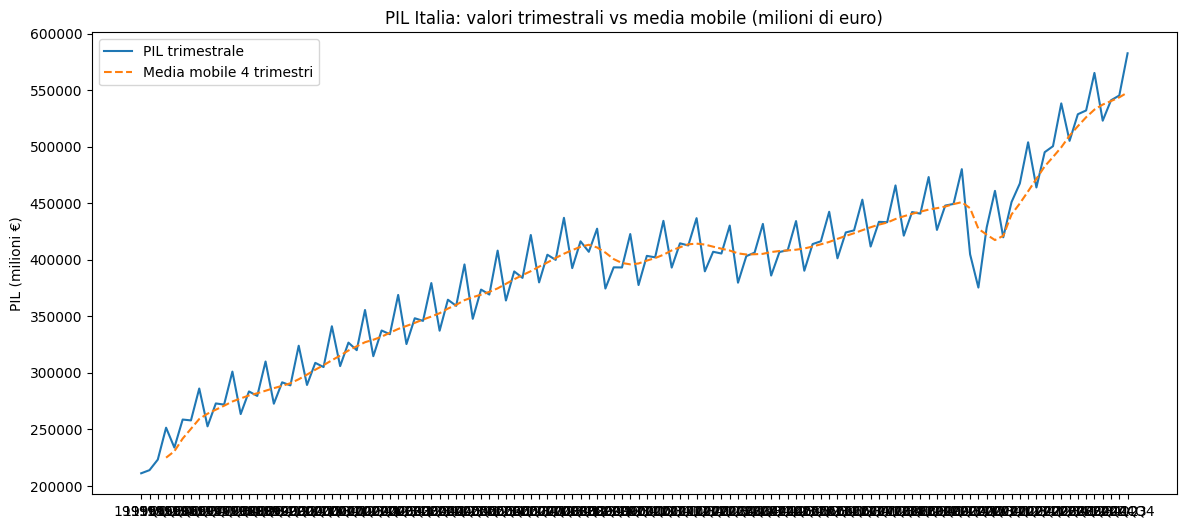

In [7]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

output_pdf = "PIL_Italia_grafici.pdf"

with PdfPages(output_pdf) as pdf:
    # === Grafico 1 ===
    plt.figure(figsize=(14, 6))
    plt.plot(df["quarter"].astype(str), df["gdp_million_eur"], label="PIL trimestrale")
    plt.plot(df["quarter"].astype(str), df["rolling_mean_4q"], label="Media mobile 4 trimestri", linestyle="--")
    plt.title("PIL Italia: valori trimestrali vs media mobile (milioni di euro)")
   # plt.xlabel("Trimestre")
    plt.ylabel("PIL (milioni €)")
    # plt.xticks(rotation=45)
    plt.legend()
    plt.grid(False)
    #plt.tight_layout()
    # pdf.savefig()
    # plt.close()
    plt.show()



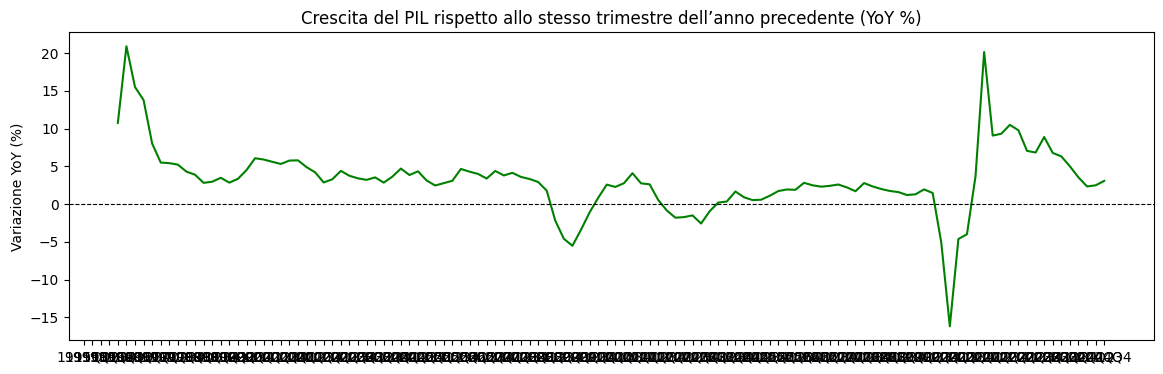

In [9]:
    # === Grafico 2 ===
plt.figure(figsize=(14, 4))
plt.plot(df["quarter"].astype(str), df["yoy_growth_pct"], color="green", label="Crescita % YoY")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.title("Crescita del PIL rispetto allo stesso trimestre dell’anno precedente (YoY %)")
# plt.xlabel("Trimestre")
plt.ylabel("Variazione YoY (%)")
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.tight_layout()
# pdf.savefig()
# plt.close()
plt.show()

# print(f"✅ File PDF salvato: {output_pdf}")


## PIL regionale

In [64]:
import os
import requests
import gzip
import pandas as pd
from io import BytesIO

# === 1. Download
url = "https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/nama_10r_3gdp?format=TSV&compressed=true"
response = requests.get(url)
response.raise_for_status()

# === 2. Decompressione TSV
with gzip.open(BytesIO(response.content), mode='rt') as f:
    df_raw = pd.read_csv(f, sep='\t')

# === 3. Separazione colonne multiple
dim_col = df_raw.columns[0]
split_cols = df_raw[dim_col].str.split(",", expand=True)

# Gestione dinamica dei nomi se non noti
num_dims = split_cols.shape[1]
col_names = ['freq', 'unit', 'geo'] if num_dims == 3 else ['freq', 'unit', 'geo'] + [f'dim_{i}' for i in range(3, num_dims)]

split_cols.columns = col_names

# === 4. Combina dimensioni con dati annuali
df_data = pd.concat([split_cols, df_raw.drop(columns=[dim_col])], axis=1)

# === 5. Conversione da wide a long
df_long = df_data.melt(id_vars=col_names, var_name='year', value_name='value')

# === 6. Pulisci e converti valori numerici
df_long['value'] = df_long['value'].str.extract(r'([\d\.,]+)').replace(',', '.', regex=True).astype(float)

# === 7. Esempio di filtro: solo dati in euro per abitante
df_eur_hab = df_long[df_long['unit'] == 'EUR_HAB'].copy()

# === 8. Mapping dei nomi delle regioni italiane
geo_map = {
    'ITC1': 'Piemonte',
    'ITC2': "Valle d'Aosta/Vallée d'Aoste",
    'ITC3': 'Liguria',
    'ITC4': 'Lombardia',
    'ITF1': 'Abruzzo',
    'ITF2': 'Molise',
    'ITF3': 'Campania',
    'ITF4': 'Puglia',
    'ITF5': 'Basilicata',
    'ITF6': 'Calabria',
    'ITG1': 'Sicilia',
    'ITG2': 'Sardegna',
    'ITI1': 'Toscana',
    'ITI2': 'Umbria',
    'ITI3': 'Marche',
    'ITI4': 'Lazio',
    'ITE1': 'Emilia-Romagna',
    'ITE2': 'Friuli-Venezia Giulia',
    'ITE3': 'Veneto',
    'ITE4': 'Trentino-Alto Adige/Südtirol',
    'ITH1': 'Provincia Autonoma di Bolzano/Bozen',
    'ITH2': 'Provincia Autonoma di Trento'
}
df_eur_hab['geo_name'] = df_eur_hab['geo'].map(geo_map)

# === 9. Visualizza i primi dati mappati correttamente
print(df_eur_hab[df_eur_hab['geo_name'].notna()].head())


     freq     unit   geo   year    value                      geo_name
1106    A  EUR_HAB  ITC1  2000   23600.0                      Piemonte
1115    A  EUR_HAB  ITC2  2000   28900.0  Valle d'Aosta/Vallée d'Aoste
1117    A  EUR_HAB  ITC3  2000   23100.0                       Liguria
1122    A  EUR_HAB  ITC4  2000   28900.0                     Lombardia
1136    A  EUR_HAB  ITF1  2000   19100.0                       Abruzzo


In [ ]:
print(sorted(df_eur_hab['geo'].unique().tolist()))

'IT', 'ITC', 'ITC1', 'ITC11', 'ITC12', 'ITC13', 'ITC14', 'ITC15', 'ITC16', 'ITC17', 'ITC18', 'ITC2', 'ITC20', 'ITC3', 'ITC31', 'ITC32', 'ITC33', 'ITC34', 'ITC4', 'ITC41', 'ITC42', 'ITC43', 'ITC44', 'ITC46', 'ITC47', 'ITC48', 'ITC49', 'ITC4A', 'ITC4B', 'ITC4C', 'ITC4D', 'ITF', 'ITF1', 'ITF11', 'ITF12', 'ITF13', 'ITF14', 'ITF2', 'ITF21', 'ITF22', 'ITF3', 'ITF31', 'ITF32', 'ITF33', 'ITF34', 'ITF35', 'ITF4', 'ITF43', 'ITF44', 'ITF45', 'ITF46', 'ITF47', 'ITF48', 'ITF5', 'ITF51', 'ITF52', 'ITF6', 'ITF61', 'ITF62', 'ITF63', 'ITF64', 'ITF65', 'ITG', 'ITG1', 'ITG11', 'ITG12', 'ITG13', 'ITG14', 'ITG15', 'ITG16', 'ITG17', 'ITG18', 'ITG19', 'ITG2', 'ITG2D', 'ITG2E', 'ITG2F', 'ITG2G', 'ITG2H', 'ITH', 'ITH1', 'ITH10', 'ITH2', 'ITH20', 'ITH3', 'ITH31', 'ITH32', 'ITH33', 'ITH34', 'ITH35', 'ITH36', 'ITH37', 'ITH4', 'ITH41', 'ITH42', 'ITH43', 'ITH44', 'ITH5', 'ITH51', 'ITH52', 'ITH53', 'ITH54', 'ITH55', 'ITH56', 'ITH57', 'ITH58', 'ITH59', 'ITI', 'ITI1', 'ITI11', 'ITI12', 'ITI13', 'ITI14', 'ITI15', 'ITI16', 'ITI17', 'ITI18', 'ITI19', 'ITI1A', 'ITI2', 'ITI21', 'ITI22', 'ITI3', 'ITI31', 'ITI32', 'ITI33', 'ITI34', 'ITI35', 'ITI4', 'ITI41', 'ITI42', 'ITI43', 'ITI44', 'ITI45'

In [65]:
df_pivot = df_eur_hab.pivot_table(
    index='geo_name',
    columns='year',
    values='value'
)
df_pivot

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
geo_name,,,,,,,,,,,,,,,,,,,,,
Abruzzo,19100.0,20000.0,20400.0,20600.0,20500.0,21500.0,22400.0,23200.0,23600.0,22600.0,...,23800.0,24100.0,24300.0,25000.0,25300.0,25600.0,23700.0,26300.0,28600.0,31000.0
Basilicata,16400.0,16900.0,17500.0,17500.0,18100.0,18400.0,19600.0,20500.0,20500.0,19400.0,...,19800.0,21600.0,21700.0,22000.0,23300.0,23200.0,21200.0,23900.0,25800.0,27500.0
Calabria,13000.0,13700.0,14100.0,14600.0,15300.0,15800.0,16400.0,16900.0,17100.0,16700.0,...,16300.0,16500.0,16800.0,17300.0,17300.0,17600.0,16600.0,18400.0,19700.0,21100.0
Campania,14500.0,15400.0,16000.0,16300.0,16800.0,17200.0,17800.0,18400.0,18500.0,17900.0,...,17400.0,17900.0,18200.0,18700.0,19000.0,19400.0,18100.0,19900.0,21800.0,23300.0
Lazio,27000.0,28700.0,30100.0,30800.0,32500.0,33100.0,34000.0,35100.0,34700.0,33800.0,...,32300.0,32300.0,33500.0,34000.0,34500.0,35000.0,32400.0,35700.0,39800.0,41700.0
Liguria,23100.0,24700.0,25000.0,26000.0,26900.0,27600.0,28500.0,30100.0,30700.0,29100.0,...,29600.0,30200.0,30900.0,31800.0,32100.0,32800.0,29700.0,32700.0,35400.0,38000.0
Lombardia,28900.0,30300.0,31500.0,32300.0,33000.0,33600.0,34400.0,35600.0,36600.0,34700.0,...,35700.0,36400.0,37400.0,38400.0,39400.0,39700.0,37300.0,42500.0,45900.0,49000.0
Marche,20600.0,21800.0,22900.0,23300.0,24100.0,24600.0,25900.0,26800.0,26400.0,25500.0,...,25600.0,25900.0,26500.0,27200.0,27700.0,28300.0,26300.0,28900.0,31100.0,33200.0
Molise,16800.0,17800.0,18200.0,18600.0,19300.0,19900.0,21200.0,22100.0,21700.0,21200.0,...,19300.0,19700.0,20000.0,20600.0,21100.0,21800.0,20600.0,23400.0,25000.0,26700.0


In [70]:
nuts3_map = {
    'ITC11': 'Torino',
    'ITC12': 'Vercelli',
    'ITC13': 'Biella',
    'ITC14': 'Verbano-Cusio-Ossola',
    'ITC15': 'Novara',
    'ITC16': 'Cuneo',
    'ITC17': 'Asti',
    'ITC18': 'Alessandria',
    'ITC20': "Valle d'Aosta",
    'ITC31': 'Imperia',
    'ITC32': 'Savona',
    'ITC33': 'Genova',
    'ITC34': 'La Spezia',
    'ITC41': 'Varese',
    'ITC42': 'Como',
    'ITC43': 'Lecco',
    'ITC44': 'Sondrio',
    'ITC46': 'Bergamo',
    'ITC47': 'Brescia',
    'ITC48': 'Pavia',
    'ITC49': 'Lodi',
    'ITC4A': 'Cremona',
    'ITC4B': 'Mantova',
    'ITC4C': 'Milano',
    'ITC4D': 'Monza e della Brianza',
    'ITH10': 'Bolzano/Bozen',
    'ITH20': 'Trento',
    'ITH31': 'Verona',
    'ITH32': 'Vicenza',
    'ITH33': 'Belluno',
    'ITH34': 'Treviso',
    'ITH35': 'Venezia',
    'ITH36': 'Padova',
    'ITH37': 'Rovigo',
    'ITH41': 'Pordenone',
    'ITH42': 'Udine',
    'ITH43': 'Gorizia',
    'ITH44': 'Trieste',
    'ITH51': 'Piacenza',
    'ITH52': 'Parma',
    'ITH53': 'Reggio Emilia',
    'ITH54': 'Modena',
    'ITH55': 'Bologna',
    'ITH56': 'Ferrara',
    'ITH57': 'Ravenna',
    'ITH58': 'Forlì-Cesena',
    'ITH59': 'Rimini',
    'ITI11': 'Massa-Carrara',
    'ITI12': 'Lucca',
    'ITI13': 'Pistoia',
    'ITI14': 'Firenze',
    'ITI15': 'Prato',
    'ITI16': 'Livorno',
    'ITI17': 'Pisa',
    'ITI18': 'Arezzo',
    'ITI19': 'Siena',
    'ITI1A': 'Grosseto',
    'ITI21': 'Perugia',
    'ITI22': 'Terni',
    'ITI31': 'Pesaro e Urbino',
    'ITI32': 'Ancona',
    'ITI33': 'Macerata',
    'ITI34': 'Ascoli Piceno',
    'ITI35': 'Fermo',
    'ITI41': 'Viterbo',
    'ITI42': 'Rieti',
    'ITI43': 'Roma',
    'ITI44': 'Latina',
    'ITI45': 'Frosinone',
    'ITF11': "L'Aquila",
    'ITF12': 'Teramo',
    'ITF13': 'Pescara',
    'ITF14': 'Chieti',
    'ITF21': 'Isernia',
    'ITF22': 'Campobasso',
    'ITF31': 'Caserta',
    'ITF32': 'Benevento',
    'ITF33': 'Napoli',
    'ITF34': 'Avellino',
    'ITF35': 'Salerno',
    'ITF43': 'Taranto',
    'ITF44': 'Brindisi',
    'ITF45': 'Lecce',
    'ITF46': 'Foggia',
    'ITF47': 'Bari',
    'ITF48': 'Barletta-Andria-Trani',
    'ITF51': 'Potenza',
    'ITF52': 'Matera',
    'ITF61': 'Cosenza',
    'ITF62': 'Crotone',
    'ITF63': 'Catanzaro',
    'ITF64': 'Vibo Valentia',
    'ITF65': 'Reggio Calabria',
    'ITG11': 'Trapani',
    'ITG12': 'Palermo',
    'ITG13': 'Messina',
    'ITG14': 'Agrigento',
    'ITG15': 'Caltanissetta',
    'ITG16': 'Enna',
    'ITG17': 'Catania',
    'ITG18': 'Ragusa',
    'ITG19': 'Siracusa',
    'ITG2D': 'Sassari',
    'ITG2E': 'Nuoro',
    'ITG2F': 'Cagliari',
    'ITG2G': 'Oristano',
    'ITG2H': 'Sud Sardegna'
}

In [74]:
# Filtra tutte le righe con codice geo che inizia per "IT" (Italia)
df_italia = df_eur_hab[df_eur_hab['geo'].str.startswith('IT')].copy()
df_italia


,freq,unit,geo,year,value,geo_name,nuts2,regione
1104,A,EUR_HAB,IT,2000,21800.0,NaN,IT,NaN
1105,A,EUR_HAB,ITC,2000,26800.0,NaN,ITC,NaN
1106,A,EUR_HAB,ITC1,2000,23600.0,NaN,ITC1,Piemonte
1107,A,EUR_HAB,ITC11,2000,25300.0,Torino,ITC1,Piemonte
1108,A,EUR_HAB,ITC12,2000,21500.0,Vercelli,ITC1,Piemonte
...,...,...,...,...,...,...,...,...
288687,A,EUR_HAB,ITI41,2023,NaN,Viterbo,ITI4,Lazio
288688,A,EUR_HAB,ITI42,2023,NaN,Rieti,ITI4,Lazio
288689,A,EUR_HAB,ITI43,2023,NaN,Roma,ITI4,Lazio
288690,A,EUR_HAB,ITI44,2023,NaN,Latina,ITI4,Lazio


In [77]:
df_italia['geo_name'] = df_italia['geo'].map(nuts3_map)


In [85]:
print(df_pivot.index.to_list())


['IT', 'ITC', 'ITC1', 'ITC11', 'ITC12', 'ITC13', 'ITC14', 'ITC15', 'ITC16', 'ITC17', 'ITC18', 'ITC2', 'ITC20', 'ITC3', 'ITC31', 'ITC32', 'ITC33', 'ITC34', 'ITC4', 'ITC41', 'ITC42', 'ITC43', 'ITC44', 'ITC46', 'ITC47', 'ITC48', 'ITC49', 'ITC4A', 'ITC4B', 'ITC4C', 'ITC4D', 'ITF', 'ITF1', 'ITF11', 'ITF12', 'ITF13', 'ITF14', 'ITF2', 'ITF21', 'ITF22', 'ITF3', 'ITF31', 'ITF32', 'ITF33', 'ITF34', 'ITF35', 'ITF4', 'ITF43', 'ITF44', 'ITF45', 'ITF46', 'ITF47', 'ITF48', 'ITF5', 'ITF51', 'ITF52', 'ITF6', 'ITF61', 'ITF62', 'ITF63', 'ITF64', 'ITF65', 'ITG', 'ITG1', 'ITG11', 'ITG12', 'ITG13', 'ITG14', 'ITG15', 'ITG16', 'ITG17', 'ITG18', 'ITG19', 'ITG2', 'ITG2D', 'ITG2E', 'ITG2F', 'ITG2G', 'ITG2H', 'ITH', 'ITH1', 'ITH10', 'ITH2', 'ITH20', 'ITH3', 'ITH31', 'ITH32', 'ITH33', 'ITH34', 'ITH35', 'ITH36', 'ITH37', 'ITH4', 'ITH41', 'ITH42', 'ITH43', 'ITH44', 'ITH5', 'ITH51', 'ITH52', 'ITH53', 'ITH54', 'ITH55', 'ITH56', 'ITH57', 'ITH58', 'ITH59', 'ITI', 'ITI1', 'ITI11', 'ITI12', 'ITI13', 'ITI14', 'ITI15', 'ITI

In [81]:
df_pivot = df_italia.pivot_table(index='geo', columns='year',values='value')
df_pivot

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
geo,,,,,,,,,,,,,,,,,,,,,
IT,21800.0,22900.0,23700.0,24300.0,25100.0,25700.0,26600.0,27500.0,27700.0,26500.0,...,27000.0,27500.0,28200.0,28900.0,29600.0,30100.0,27900.0,31200.0,33800.0,36100.0
ITC,26800.0,28100.0,29100.0,30000.0,30700.0,31400.0,32200.0,33300.0,34000.0,32000.0,...,33100.0,33700.0,34700.0,35700.0,36500.0,36900.0,34500.0,38800.0,41800.0,44700.0
ITC1,23600.0,24700.0,25500.0,26300.0,27100.0,27800.0,28800.0,29500.0,29400.0,27300.0,...,28200.0,28900.0,29700.0,30800.0,31600.0,31900.0,29500.0,32200.0,34500.0,36700.0
ITC11,25300.0,26100.0,26800.0,27300.0,28000.0,28800.0,29800.0,30500.0,31000.0,28600.0,...,29600.0,30300.0,31400.0,32600.0,33700.0,33600.0,30800.0,33500.0,35600.0,NaN
ITC12,21500.0,23000.0,24500.0,25800.0,27000.0,26200.0,28600.0,29300.0,27100.0,24800.0,...,26000.0,26500.0,26700.0,27500.0,28000.0,28200.0,27800.0,30400.0,32400.0,NaN
ITC13,22500.0,23400.0,23300.0,23400.0,23000.0,23900.0,25500.0,26200.0,27100.0,24700.0,...,25100.0,25900.0,26300.0,26900.0,27900.0,27600.0,25300.0,28300.0,30600.0,NaN
ITC14,18600.0,19600.0,20400.0,21100.0,21500.0,22400.0,23800.0,24000.0,22600.0,21500.0,...,23100.0,23200.0,23600.0,24600.0,24600.0,25300.0,22600.0,25300.0,27600.0,NaN
ITC15,24000.0,24700.0,25500.0,26300.0,27100.0,27600.0,28600.0,29400.0,28000.0,25800.0,...,26800.0,27800.0,28800.0,29600.0,30300.0,31300.0,29200.0,32500.0,34600.0,NaN
ITC16,23000.0,24300.0,25700.0,27500.0,29000.0,30000.0,30400.0,31500.0,31200.0,29000.0,...,29700.0,30200.0,31100.0,32200.0,32600.0,33500.0,32000.0,34000.0,37200.0,NaN


In [92]:
# Codici NUTS2 da mantenere
nuts2_keep = [
    'ITC1', 'ITC2', 'ITC3', 'ITC4',    # Nord-Ovest
    'ITF1', 'ITF2', 'ITF3', 'ITF4', 'ITF5', 'ITF6',  # Sud
    'ITG1', 'ITG2',                     # Isole
    'ITH1', 'ITH2', 'ITH3', 'ITH4', 'ITH5',    # Nord-Est
    'ITI1', 'ITI2', 'ITI3', 'ITI4'      # Centro
]

# Filtro sul DataFrame con indice
df_filtered = df_pivot[df_pivot.index.isin(nuts2_keep)]
df_filtered

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
geo,,,,,,,,,,,,,,,,,,,,,
ITC1,23600.0,24700.0,25500.0,26300.0,27100.0,27800.0,28800.0,29500.0,29400.0,27300.0,...,28200.0,28900.0,29700.0,30800.0,31600.0,31900.0,29500.0,32200.0,34500.0,36700.0
ITC2,28900.0,30400.0,31300.0,33400.0,34000.0,34800.0,35900.0,36600.0,37500.0,35700.0,...,36300.0,36500.0,36300.0,37800.0,38300.0,38800.0,35800.0,38700.0,44000.0,46300.0
ITC3,23100.0,24700.0,25000.0,26000.0,26900.0,27600.0,28500.0,30100.0,30700.0,29100.0,...,29600.0,30200.0,30900.0,31800.0,32100.0,32800.0,29700.0,32700.0,35400.0,38000.0
ITC4,28900.0,30300.0,31500.0,32300.0,33000.0,33600.0,34400.0,35600.0,36600.0,34700.0,...,35700.0,36400.0,37400.0,38400.0,39400.0,39700.0,37300.0,42500.0,45900.0,49000.0
ITF1,19100.0,20000.0,20400.0,20600.0,20500.0,21500.0,22400.0,23200.0,23600.0,22600.0,...,23800.0,24100.0,24300.0,25000.0,25300.0,25600.0,23700.0,26300.0,28600.0,31000.0
ITF2,16800.0,17800.0,18200.0,18600.0,19300.0,19900.0,21200.0,22100.0,21700.0,21200.0,...,19300.0,19700.0,20000.0,20600.0,21100.0,21800.0,20600.0,23400.0,25000.0,26700.0
ITF3,14500.0,15400.0,16000.0,16300.0,16800.0,17200.0,17800.0,18400.0,18500.0,17900.0,...,17400.0,17900.0,18200.0,18700.0,19000.0,19400.0,18100.0,19900.0,21800.0,23300.0
ITF4,14300.0,15000.0,15400.0,15700.0,16200.0,16500.0,17200.0,17500.0,17300.0,16900.0,...,17400.0,17800.0,18300.0,18600.0,19100.0,19500.0,18400.0,20200.0,22000.0,23500.0
ITF5,16400.0,16900.0,17500.0,17500.0,18100.0,18400.0,19600.0,20500.0,20500.0,19400.0,...,19800.0,21600.0,21700.0,22000.0,23300.0,23200.0,21200.0,23900.0,25800.0,27500.0


In [94]:
# Lista dei codici NUTS2 da tenere
nuts2_keep = [
    'ITC1', 'ITC2', 'ITC3', 'ITC4',     # Nord-Ovest
    'ITH1', 'ITH2', 'ITH3', 'ITH4','ITH5',    # Nord-Est
    'ITI1', 'ITI2', 'ITI3', 'ITI4',     # Centro
    'ITF1', 'ITF2', 'ITF3', 'ITF4', 'ITF5', 'ITF6',  # Sud
    'ITG1', 'ITG2'                      # Isole
]

# Mappa da codice NUTS2 a nome regione
nuts2_to_regione = {
    'ITC1': 'Piemonte',
    'ITC2': 'Valle d\'Aosta',
    'ITC3': 'Liguria',
    'ITC4': 'Lombardia',
    
    'ITH1': 'Provincia Autonoma di Bolzano',
    'ITH2': 'Provincia Autonoma di Trento',
    'ITH3': 'Veneto',
    'ITH4': 'Friuli-Venezia Giulia',
    'ITH5': 'Emilia-Romagna',
    
    'ITI1': 'Toscana',
    'ITI2': 'Umbria',
    'ITI3': 'Marche',
    'ITI4': 'Lazio',
    
    'ITF1': 'Abruzzo',
    'ITF2': 'Molise',
    'ITF3': 'Campania',
    'ITF4': 'Puglia',
    'ITF5': 'Basilicata',
    'ITF6': 'Calabria',
    
    'ITG1': 'Sicilia',
    'ITG2': 'Sardegna'
}

# Mappa da codice NUTS2 ad area geografica
nuts2_to_area = {
    'ITC1': 'Nord-Ovest', 'ITC2': 'Nord-Ovest', 'ITC3': 'Nord-Ovest', 'ITC4': 'Nord-Ovest',
    'ITH1': 'Nord-Est', 'ITH2': 'Nord-Est', 'ITH3': 'Nord-Est', 'ITH4': 'Nord-Est','ITH5': 'Nord-Est',
    'ITI1': 'Centro', 'ITI2': 'Centro', 'ITI3': 'Centro', 'ITI4': 'Centro',
    'ITF1': 'Sud', 'ITF2': 'Sud', 'ITF3': 'Sud', 'ITF4': 'Sud', 'ITF5': 'Sud', 'ITF6': 'Sud',
    'ITG1': 'Isole', 'ITG2': 'Isole'
}

# Applica i filtri
df_filtered = df_pivot[df_pivot.index.isin(nuts2_keep)].copy()

# Aggiungi colonne mappate
df_filtered['regione'] = df_filtered.index.map(nuts2_to_regione)
df_filtered['area'] = df_filtered.index.map(nuts2_to_area)

# Ordina
df_filtered = df_filtered.sort_values(by=['area', 'regione'])

# Visualizza
df_filtered


year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2016,2017,2018,2019,2020,2021,2022,2023,regione,area
geo,,,,,,,,,,,,,,,,,,,,,
ITI4,27000.0,28700.0,30100.0,30800.0,32500.0,33100.0,34000.0,35100.0,34700.0,33800.0,...,33500.0,34000.0,34500.0,35000.0,32400.0,35700.0,39800.0,41700.0,Lazio,Centro
ITI3,20600.0,21800.0,22900.0,23300.0,24100.0,24600.0,25900.0,26800.0,26400.0,25500.0,...,26500.0,27200.0,27700.0,28300.0,26300.0,28900.0,31100.0,33200.0,Marche,Centro
ITI1,23100.0,24200.0,25000.0,25700.0,26500.0,26900.0,27900.0,28900.0,28900.0,28100.0,...,30200.0,30900.0,31700.0,33000.0,29200.0,32500.0,35600.0,37600.0,Toscana,Centro
ITI2,21500.0,22600.0,23000.0,23600.0,24300.0,24600.0,25700.0,26400.0,26500.0,24700.0,...,24600.0,25300.0,26200.0,26500.0,24400.0,26700.0,28800.0,30500.0,Umbria,Centro
ITG2,15300.0,16200.0,16600.0,17300.0,18100.0,18500.0,19200.0,19800.0,20300.0,19800.0,...,20400.0,20900.0,21300.0,21900.0,20400.0,22500.0,24500.0,26300.0,Sardegna,Isole
ITG1,13900.0,14700.0,15200.0,15700.0,16100.0,16900.0,17500.0,17800.0,18000.0,17500.0,...,17400.0,17800.0,18000.0,18300.0,17300.0,19100.0,21200.0,22900.0,Sicilia,Isole
ITH5,26800.0,27800.0,28500.0,29000.0,29900.0,30500.0,31900.0,33200.0,33200.0,31200.0,...,34500.0,35500.0,36200.0,36500.0,34100.0,38100.0,40700.0,43300.0,Emilia-Romagna,Nord-Est
ITH4,23600.0,24800.0,25400.0,25500.0,26300.0,27300.0,28500.0,29600.0,29200.0,27500.0,...,30100.0,30800.0,31800.0,32600.0,30400.0,33800.0,35800.0,37700.0,Friuli-Venezia Giulia,Nord-Est
ITH1,31300.0,32200.0,32500.0,33500.0,35300.0,35600.0,37300.0,38600.0,39300.0,38800.0,...,44300.0,45600.0,47300.0,48400.0,44900.0,49800.0,56000.0,59800.0,Provincia Autonoma di Bolzano,Nord-Est


In [55]:
df_long['unit'].unique()

array(['EUR_HAB', 'EUR_HAB_EU27_2020', 'MIO_EUR', 'MIO_NAC',
       'MIO_PPS_EU27_2020', 'PPS_EU27_2020_HAB', 'PPS_HAB_EU27_2020'],
      dtype=object)

Questi sono i valori della colonna `unit` presenti nel dataset Eurostat `nama_10r_3gdp` e rappresentano diverse modalità di esprimere il PIL regionale. Ecco una **spiegazione sintetica** per ciascuno:

| `unit`              | Significato                                    | Dettaglio                                                               |
| ------------------- | ---------------------------------------------- | ----------------------------------------------------------------------- |
| `EUR_HAB`           | Euro per abitante                              | PIL pro capite in euro correnti                                         |
| `EUR_HAB_EU27_2020` | Euro per abitante, con base UE27 2020          | Simile a `EUR_HAB`, ma allineato alla nuova base statistica post-Brexit |
| `MIO_EUR`           | Milioni di euro                                | PIL totale a valori correnti                                            |
| `MIO_NAC`           | Milioni di valuta nazionale                    | Uguale a `MIO_EUR` per l’Italia (euro)                                  |
| `MIO_PPS_EU27_2020` | Milioni di standard di potere d'acquisto (PPS) | PIL totale corretto per il potere d'acquisto                            |
| `PPS_EU27_2020_HAB` | PPS per abitante                               | PIL pro capite corretto per potere d'acquisto                           |
| `PPS_HAB_EU27_2020` | PPS per abitante (base UE27 2020)              | Stessa idea, base aggiornata UE27 post-Brexit                           |

---

### 🔍 Quale usare?

Dipende dal tipo di confronto:

* Per **confronti tra regioni italiane** → `EUR_HAB` o `MIO_EUR`
* Per **confronti tra regioni europee** → `PPS_HAB_EU27_2020` o `MIO_PPS_EU27_2020`
* Per **analisi pro capite corretta per costo della vita** → `PPS_HAB_EU27_2020`
* Per **valori assoluti macroeconomici** → `MIO_EUR`

Vuoi che ti costruisca una tabella comparativa tra regioni italiane su 2 o più di queste unità?


In [51]:
df_long['geo'].unique()

array(['AL', 'AL0', 'AL01', ..., 'TRC32', 'TRC33', 'TRC34'],
      shape=(1764,), dtype=object)